# Property valuation forecaster

Created By: Olena Peretiatko & Roman Bilets

In [75]:
# Packages import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
from sklearn.model_selection import train_test_split

In [76]:
# Algorithms import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Metrics for evaluation import
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

In [78]:
sns.set_style('whitegrid') # plot style
plt.rcParams["figure.figsize"] = (20, 10)  # plot size

## Importing Data and performing EDA on the Data.


In [79]:
# Data import

df = pd.read_parquet("../dataset/kyiv_real_estate_final.parquet")
df.head(10)


,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,...,project,wall,currency,bad_proposal,street,year,street_id,hist_district_id,admin_district_id,wall_id
0,377514444,1865470,23327,vul. Radchenka,"ZhK vul. Petra Radchenka, 27-29",Solom'yanka,Solom'yans'kyy,Kyyiv,BEZ KOMYSSYY!!! Vydovaya 3K kvartyra v novostr...,3,...,NA,monolitno-karkasnyy,UAH,0,vul. Radchenka,None,580,64,14,3
1,381003995,90000,732,"vul. Boryspil's'ka, 34",NA,Nova Darnytsya,Darnyts'kyy,Kyyiv,Prodaetsya 5- komn kvartyra ul Boryspol's'kaya...,5,...,seriya KT,uteplena panel',USD,0,vul. Boryspil's'ka,1989,199,38,1,6
2,380950780,2031688,33822,vul. Prychal'na,ZhK Urlivs'kyy,Poznyaky,Darnyts'kyy,Kyyiv,Novyy suchasnyy ZhK Urlivs'kyy-1 proponuye 2-k...,2,...,NA,tsehlyanyy budynok,UAH,1,vul. Prychal'na,None,569,51,1,5
3,379779512,330000,3000,"Laboratornyy prov., 7",ZhK Alter Ego,Cherepanova hora,Pechers'kyy,Kyyiv,"BEZ KOMYSSYY dlya pokupatelya, predlozhenye ot...",3,...,spets. proekt,monolitno-karkasnyy,USD,0,Laboratornyy prov.,2018,32,10,11,3
4,379989748,82000,1367,"vul. Mykoly Holeho (Lyebyedeva-Kumacha), 5",NA,Karavayevi Dachi,Solom'yans'kyy,Kyyiv,Prodaetsya prostornaya odnokomnatnaya kvartyra...,1,...,spets. proekt,tsehlyanyy budynok,USD,0,vul. Mykoly Holeho (Lyebyedeva-Kumacha),2005,452,22,14,5
5,381009891,42000,1091,"vul. Nikolayeva, 9a",NA,Troyeshchyna,Desnyans'kyy,Kyyiv,Prodam 1k kvartyru v Desnyanskom r-ne po ul.Ny...,1,...,seriya KT,uteplena panel',USD,0,vul. Nikolayeva,1986,482,75,3,6
6,381000164,235000,3133,prosp. Heroyiv Stalinhrada,ZhK Oazys,Obolon',Obolons'kyy,Kyyiv,"Pr. Heroev Stalynhrada, 2h. ZhK Oazys. 11/24et...",3,...,NA,tsehlyanyy budynok,USD,0,prosp. Heroyiv Stalinhrada,2008,116,44,9,5
7,380881846,260000,1883,vul. Richkova,"ZhK vul. Richna, 4",Luk'yanivka,Shevchenkivs'kyy,Kyyiv,"3 kom kvartyra ul Rechnaya 4, zhk byznes klass...",3,...,NA,NA,USD,0,vul. Richkova,None,589,31,13,1
8,375158537,169900,1103,"vul. Minina, 9",NA,Sotsmisto,Dniprovs'kyy,Kyyiv,BEZ KOMYSSYY. FOTO SOOTVETSTVUYuT. Dneprovskyy...,5,...,spets. proekt,monolitno-karkasnyy,USD,0,vul. Minina,2000,438,65,4,3
9,381066330,75000,2885,"vul. Pol'ova, 73","ZhK vul. Pol'ova, 73",Karavayevi Dachi,Solom'yans'kyy,Kyyiv,Prodam kvartyru s novym remontom. Zhk Karavaev...,1,...,spets. proekt,monolitno-karkasnyy,USD,0,vul. Pol'ova,2020,549,22,14,3


In [80]:
df.columns


Index(['id', 'price', 'price_sm', 'address', 'complex', 'hist_district',
       'admin_district', 'city', 'description', 'rooms', 'area_total',
       'area_living', 'area_kitchen', 'stock', 'stock_total', 'project',
       'wall', 'currency', 'bad_proposal', 'street', 'year', 'street_id',
       'hist_district_id', 'admin_district_id', 'wall_id'],
      dtype='object')

In [ ]:
for col_name in ["area_total", "price"]:
    df[col_name] = pd.to_numeric(df[col_name])

In [81]:
df['currency'].unique()

array(['UAH', 'USD'], dtype=object)

In [83]:
# Performing data preprocessing and feature engineering

df["price_in_usd"] = np.where(df["currency"] == "USD", df["price"], df["price"] * 0.0365)

df = df.drop(
    columns=[
        "id",
        "bad_proposal",
        "description",
        "currency",
        "price",
        "price_sm",
        "address",
    ],
    axis=1,
)

df.head(10)


,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,stock,stock_total,project,wall,street,year,street_id,hist_district_id,admin_district_id,wall_id,price_in_usd
0,"ZhK vul. Petra Radchenka, 27-29",Solom'yanka,Solom'yans'kyy,Kyyiv,3,79.97,43.09,12.68,5,25,NA,monolitno-karkasnyy,vul. Radchenka,None,580,64,14,3,68089.655
1,NA,Nova Darnytsya,Darnyts'kyy,Kyyiv,5,123.00,71.2,16.6,3,16,seriya KT,uteplena panel',vul. Boryspil's'ka,1989,199,38,1,6,90000.000
2,ZhK Urlivs'kyy,Poznyaky,Darnyts'kyy,Kyyiv,2,60.07,NA,14.5,9,26,NA,tsehlyanyy budynok,vul. Prychal'na,None,569,51,1,5,74156.612
3,ZhK Alter Ego,Cherepanova hora,Pechers'kyy,Kyyiv,3,110.00,60,40,18,24,spets. proekt,monolitno-karkasnyy,Laboratornyy prov.,2018,32,10,11,3,330000.000
4,NA,Karavayevi Dachi,Solom'yans'kyy,Kyyiv,1,60.00,21,23,10,17,spets. proekt,tsehlyanyy budynok,vul. Mykoly Holeho (Lyebyedeva-Kumacha),2005,452,22,14,5,82000.000
5,NA,Troyeshchyna,Desnyans'kyy,Kyyiv,1,38.50,17.7,8.4,13,16,seriya KT,uteplena panel',vul. Nikolayeva,1986,482,75,3,6,42000.000
6,ZhK Oazys,Obolon',Obolons'kyy,Kyyiv,3,75.00,45,15,11,24,NA,tsehlyanyy budynok,prosp. Heroyiv Stalinhrada,2008,116,44,9,5,235000.000
7,"ZhK vul. Richna, 4",Luk'yanivka,Shevchenkivs'kyy,Kyyiv,3,138.05,58.39,46.86,18,23,NA,NA,vul. Richkova,None,589,31,13,1,260000.000
8,NA,Sotsmisto,Dniprovs'kyy,Kyyiv,5,154.00,95,18,16,17,spets. proekt,monolitno-karkasnyy,vul. Minina,2000,438,65,4,3,169900.000
9,"ZhK vul. Pol'ova, 73",Karavayevi Dachi,Solom'yans'kyy,Kyyiv,1,26.00,NA,26,20,25,spets. proekt,monolitno-karkasnyy,vul. Pol'ova,2020,549,22,14,3,75000.000


In [84]:
df.shape


(14065, 19)

In [85]:
df.columns


Index(['complex', 'hist_district', 'admin_district', 'city', 'rooms',
       'area_total', 'area_living', 'area_kitchen', 'stock', 'stock_total',
       'project', 'wall', 'street', 'year', 'street_id', 'hist_district_id',
       'admin_district_id', 'wall_id', 'price_in_usd'],
      dtype='object')

In [86]:
# Dropping null values
df.dropna(inplace=True)
df.isnull().sum()


complex              0
hist_district        0
admin_district       0
city                 0
rooms                0
area_total           0
area_living          0
area_kitchen         0
stock                0
stock_total          0
project              0
wall                 0
street               0
year                 0
street_id            0
hist_district_id     0
admin_district_id    0
wall_id              0
price_in_usd         0
dtype: int64

In [87]:
df.describe()

,area_total,street_id,hist_district_id,admin_district_id,wall_id,price_in_usd
count,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,1.281400e+04
mean,87.255620,385.052677,46.434993,8.402841,3.963087,1.964936e+05
std,59.408346,226.995512,25.561713,4.666565,1.183194,3.413217e+05
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.750000e+04
25%,52.000000,190.000000,31.000000,4.000000,3.000000,6.900000e+04
50%,72.000000,343.000000,44.000000,11.000000,3.000000,1.066367e+05
75%,100.000000,587.000000,63.000000,12.000000,5.000000,1.950000e+05
max,1000.000000,800.000000,140.000000,15.000000,6.000000,1.100000e+07


In [88]:
df.shape


(12814, 19)

In [89]:
df.dtypes


complex               object
hist_district         object
admin_district        object
city                  object
rooms                 object
area_total           float64
area_living           object
area_kitchen          object
stock                 object
stock_total           object
project               object
wall                  object
street                object
year                  object
street_id              int64
hist_district_id       int64
admin_district_id      int64
wall_id                int64
price_in_usd         float64
dtype: object

## Data Visualization


### Heatmaps

In [90]:
df_without_na = df

for col_name in df_without_na.columns:
    df_without_na.drop(
        df_without_na.loc[df_without_na[col_name] == "NA"].index, inplace=True
    )
df_without_na

,complex,hist_district,admin_district,city,rooms,area_total,area_living,area_kitchen,stock,stock_total,project,wall,street,year,street_id,hist_district_id,admin_district_id,wall_id,price_in_usd
3,ZhK Alter Ego,Cherepanova hora,Pechers'kyy,Kyyiv,3,110.0,60,40,18,24,spets. proekt,monolitno-karkasnyy,Laboratornyy prov.,2018,32,10,11,3,330000.0
16,"ZhK vul. Inzhenera Borodina (Lazo), 4-6",DVRZ,Dniprovs'kyy,Kyyiv,3,89.0,53,10,18,22,spets. proekt,panel'ni,vul. Borodina (Serhiya Lazo),2012,192,13,4,4,90000.0
18,ZhK Liko-Hrad 3,Teremky-2,Holosiyivs'kyy,Kyyiv,1,43.0,9.9,24.6,14,18,spets. proekt,monolitno-karkasnyy,vul. Lomonosova,2014,392,74,5,3,85000.0
20,"ZhK vul. Drahomanova, 6/1",Poznyaky,Darnyts'kyy,Kyyiv,3,109.0,83,16,23,26,spets. proekt,monolitno-karkasnyy,vul. Drahomanova,2011,252,51,1,3,125000.0
29,ZhK Zlatoustivs'kyy,Soldats'ka slobidka,Shevchenkivs'kyy,Kyyiv,3,89.0,62,12,4,9,spets. proekt,monolitno-karkasnyy,vul. Poltavs'ka,2013,554,63,13,3,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14060,ZhK Halaktyka,Livoberezhnyy masyv,Dniprovs'kyy,Kyyiv,2,67.0,31,23,25,25,spets. proekt,monolitno-karkasnyy,vul. Sverstyuka (Maryny Raskovoyi),2019,662,30,4,3,80000.0
14061,ZhK Halaktyka,Livoberezhnyy masyv,Dniprovs'kyy,Kyyiv,1,44.0,14,16,17,25,spets. proekt,monolitno-karkasnyy,vul. Sverstyuka (Maryny Raskovoyi),2019,662,30,4,3,58000.0
14062,ZhK Halaktyka,Livoberezhnyy masyv,Dniprovs'kyy,Kyyiv,1,49.0,17,16,16,25,spets. proekt,monolitno-karkasnyy,vul. Sverstyuka (Maryny Raskovoyi),2019,662,30,4,3,60000.0
14063,ZhK Cardinal,Nova zabudova,Pechers'kyy,Kyyiv,3,117.0,75,26,8,25,spets. proekt,monolitno-karkasnyy,vul. Tyutyunnyka (Anri Barbyusa),2019,698,39,11,3,240000.0


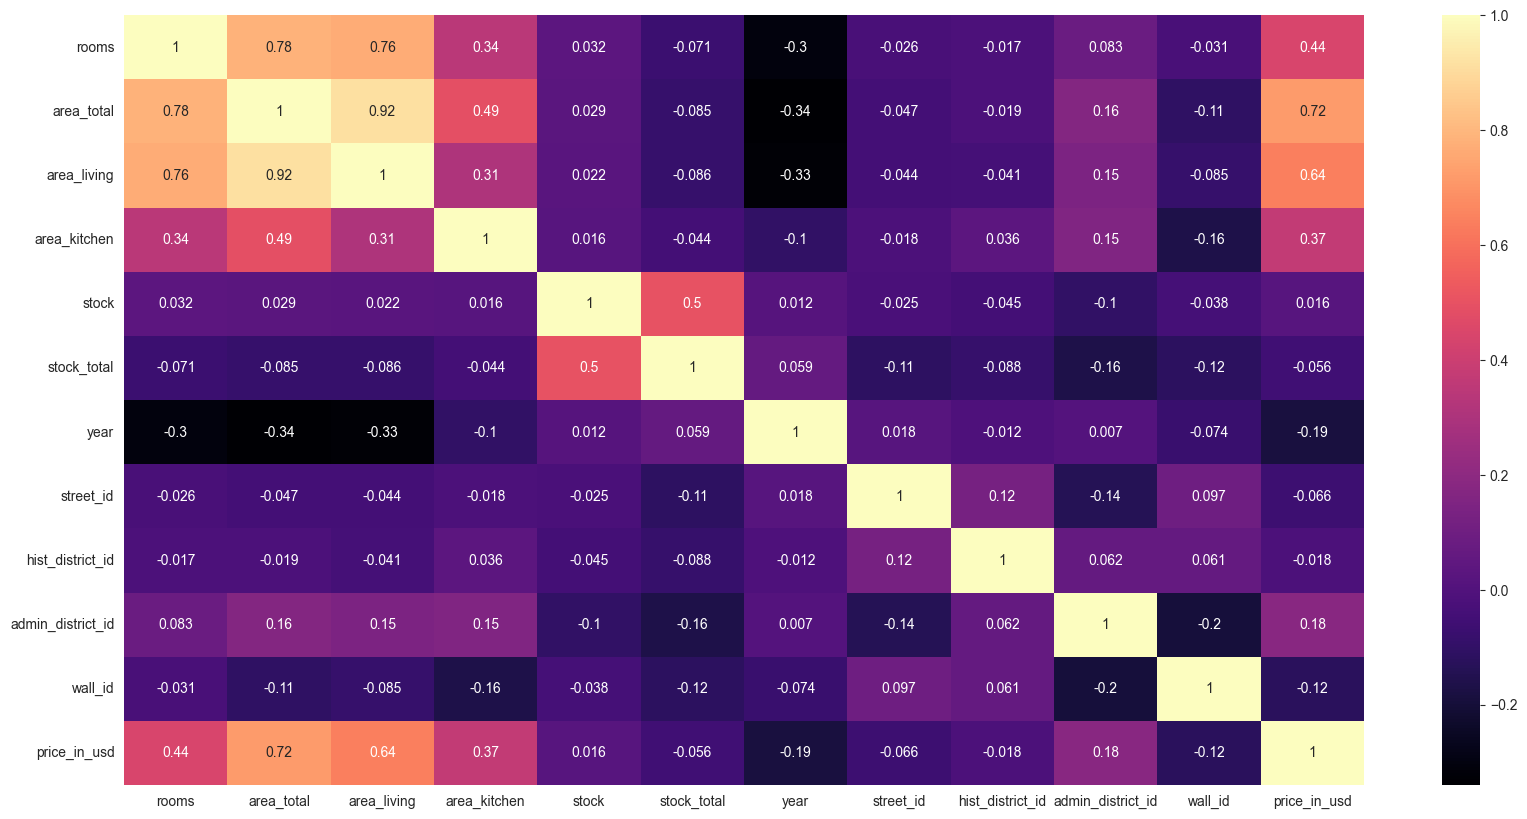

In [91]:
df_for_heatmap = df_without_na.drop(
    columns=[
        "complex",
        "hist_district",
        "admin_district",
        "city",
        "street",
        "project",
        "wall",
    ]
)

sns.heatmap(df_for_heatmap.corr(), annot=True, cmap="magma")
plt.show()


### Scatter Plot

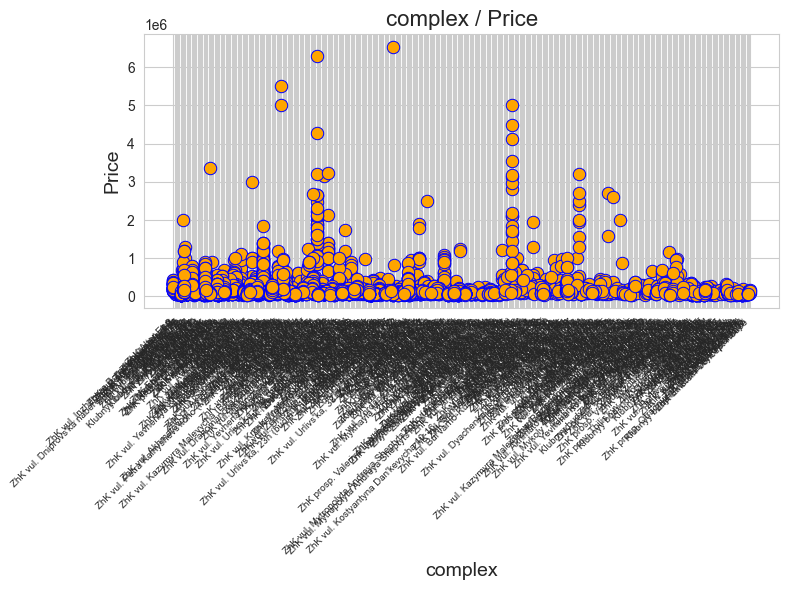

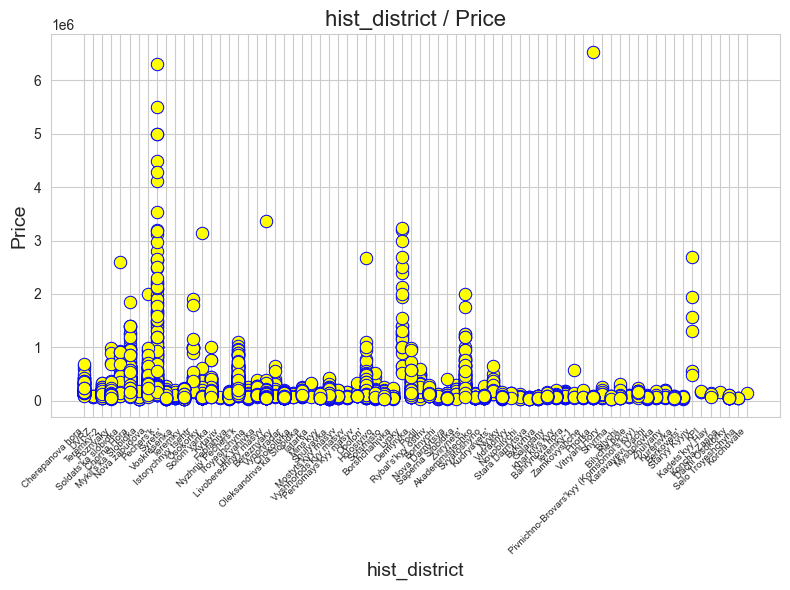

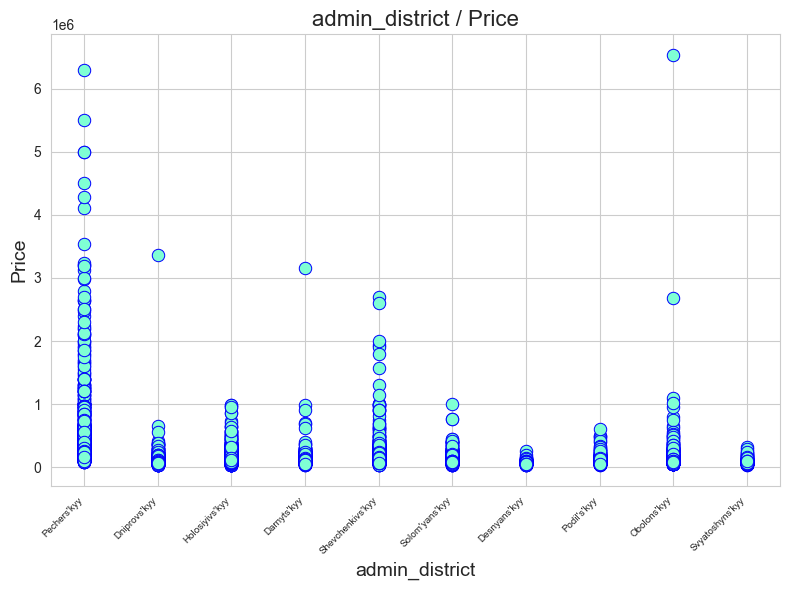

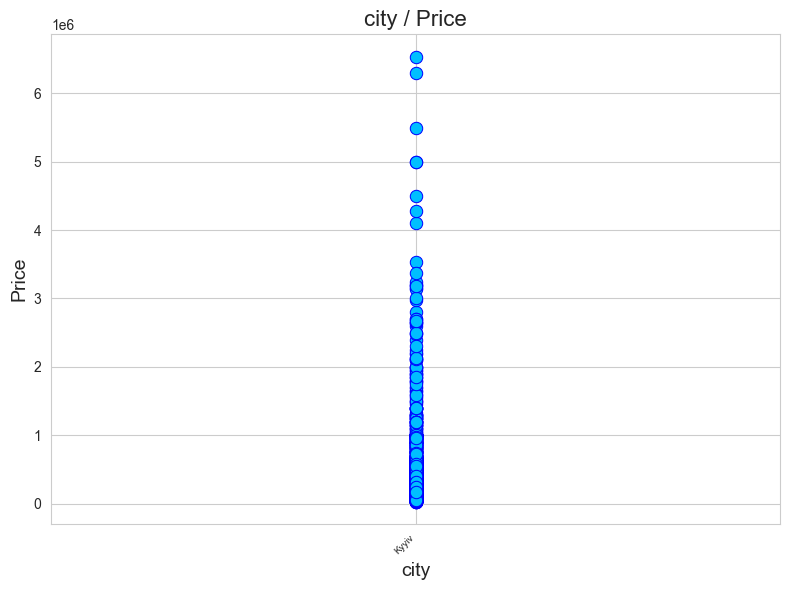

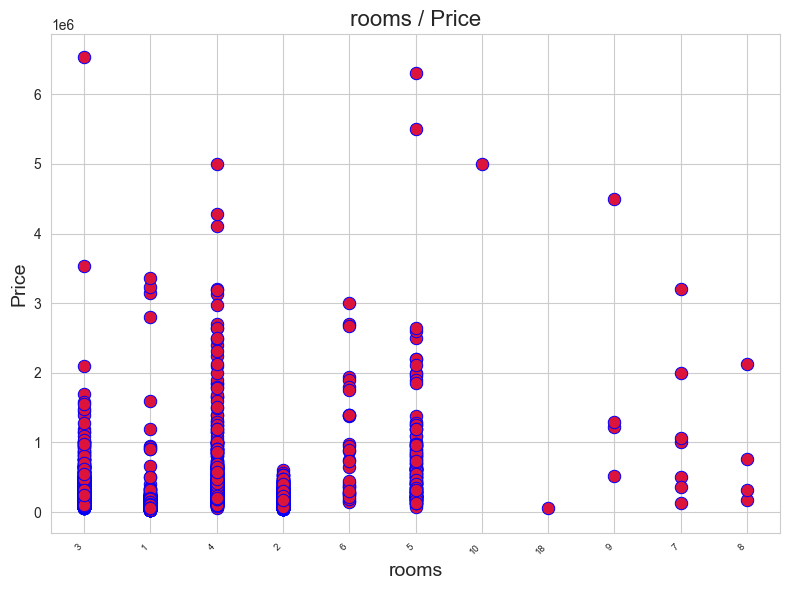

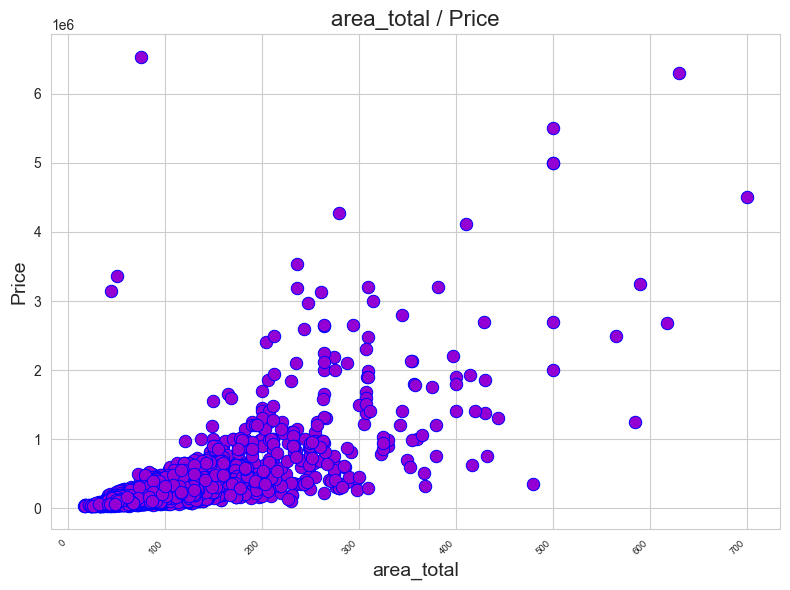

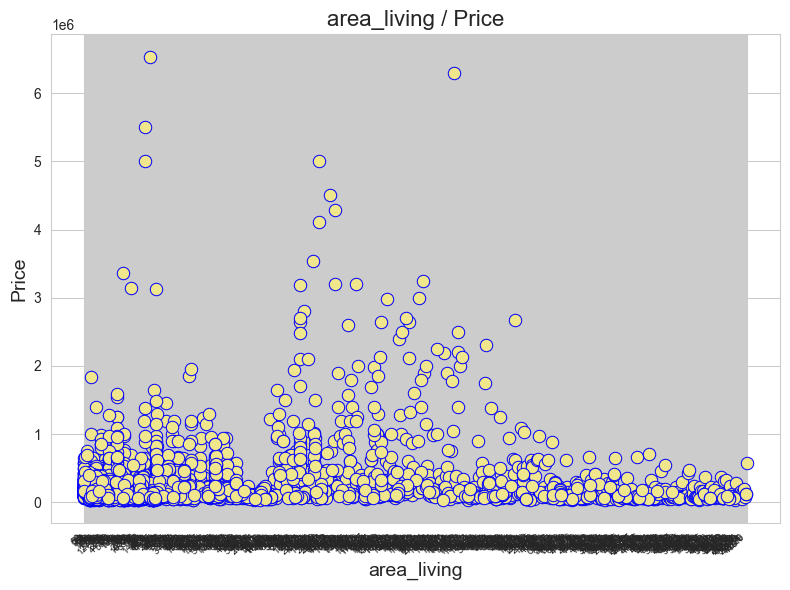

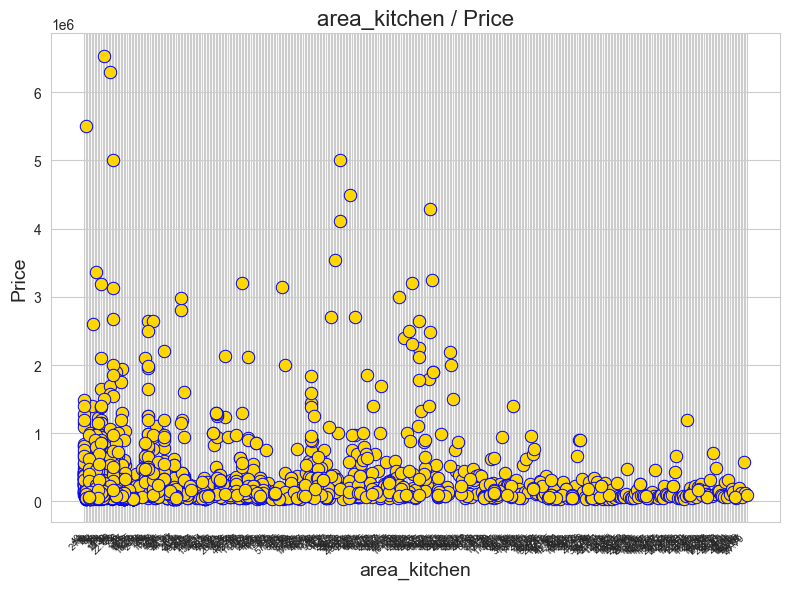

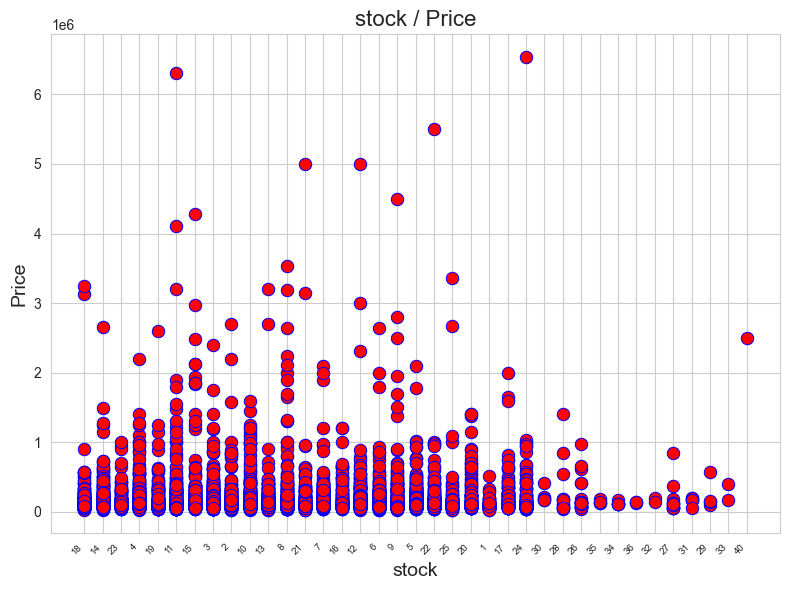

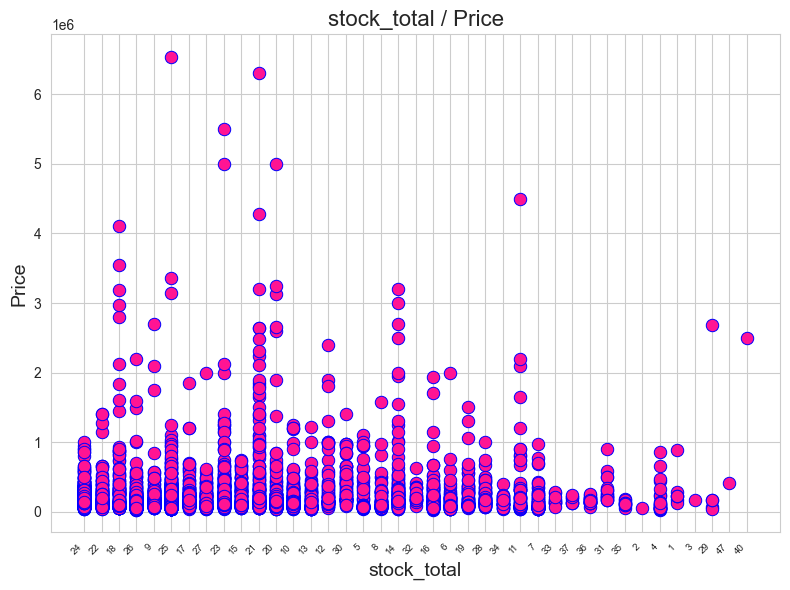

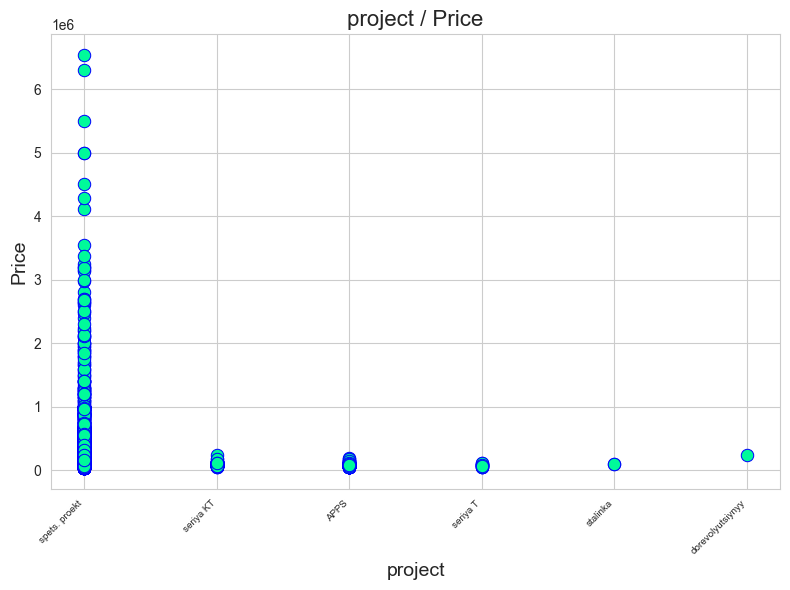

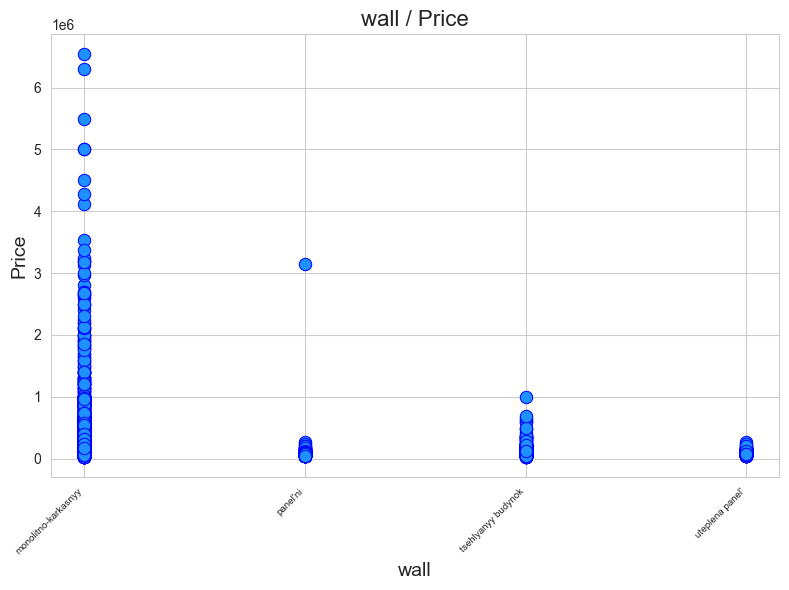

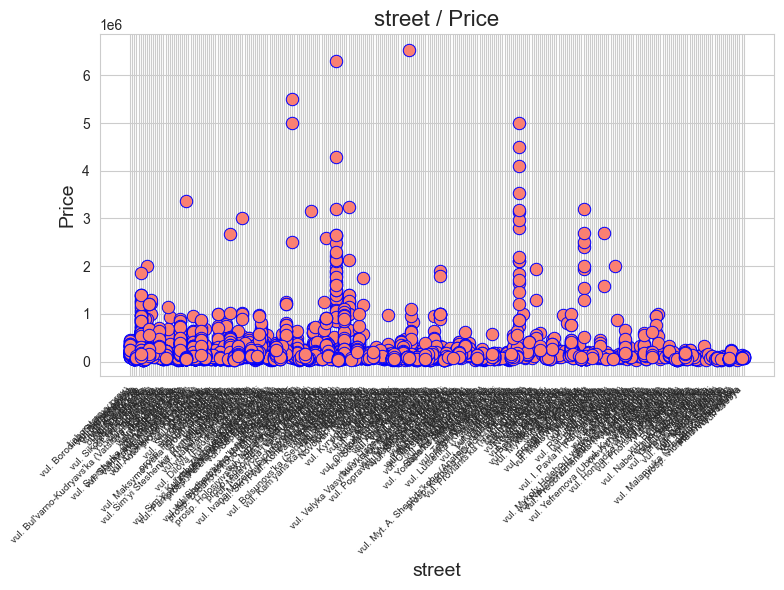

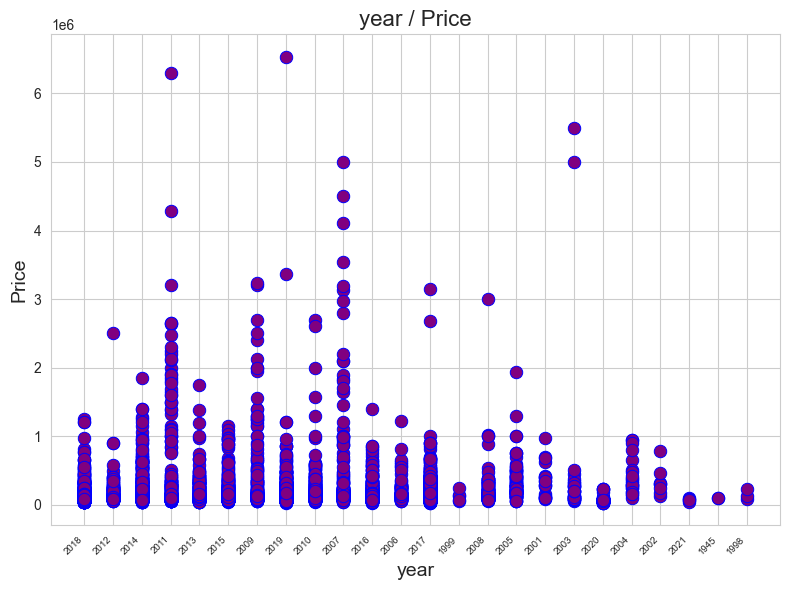

In [92]:

def scatter_df(y_var):
    i = df_without_na.columns[0:14]
    print()

    for index, feature in enumerate(i):
        if feature == y_var:
            continue  # Skip plotting for y_var

        color = [
            "orange",
            "yellow",
            "aquamarine",
            "deepskyblue",
            "crimson",
            "darkviolet",
            "khaki",
            "gold",
            "r",
            "deeppink",
            "mediumspringgreen",
            "dodgerblue",
            "salmon",
            "purple",
            "lightcoral",

        ][index]

        plt.figure(figsize=(8, 6))  # Set the width and height of the figure
        sns.scatterplot(
            x=feature, y=y_var, data=df_without_na, color=color, edgecolor="b", s=80
        )
        plt.title("{} / Price".format(feature), fontsize=16)
        plt.xlabel("{}".format(feature), fontsize=14)
        plt.ylabel("Price", fontsize=14)
        plt.xticks(
            rotation=45, ha="right", fontsize=7
        )  # Rotate labels, align right, and set fontsize
        plt.subplots_adjust(bottom=0.6)  # Adjust bottom margin
        plt.tight_layout()  # Adjust spacing
        plt.show()


scatter_df("price_in_usd")


#### Distribution Plot


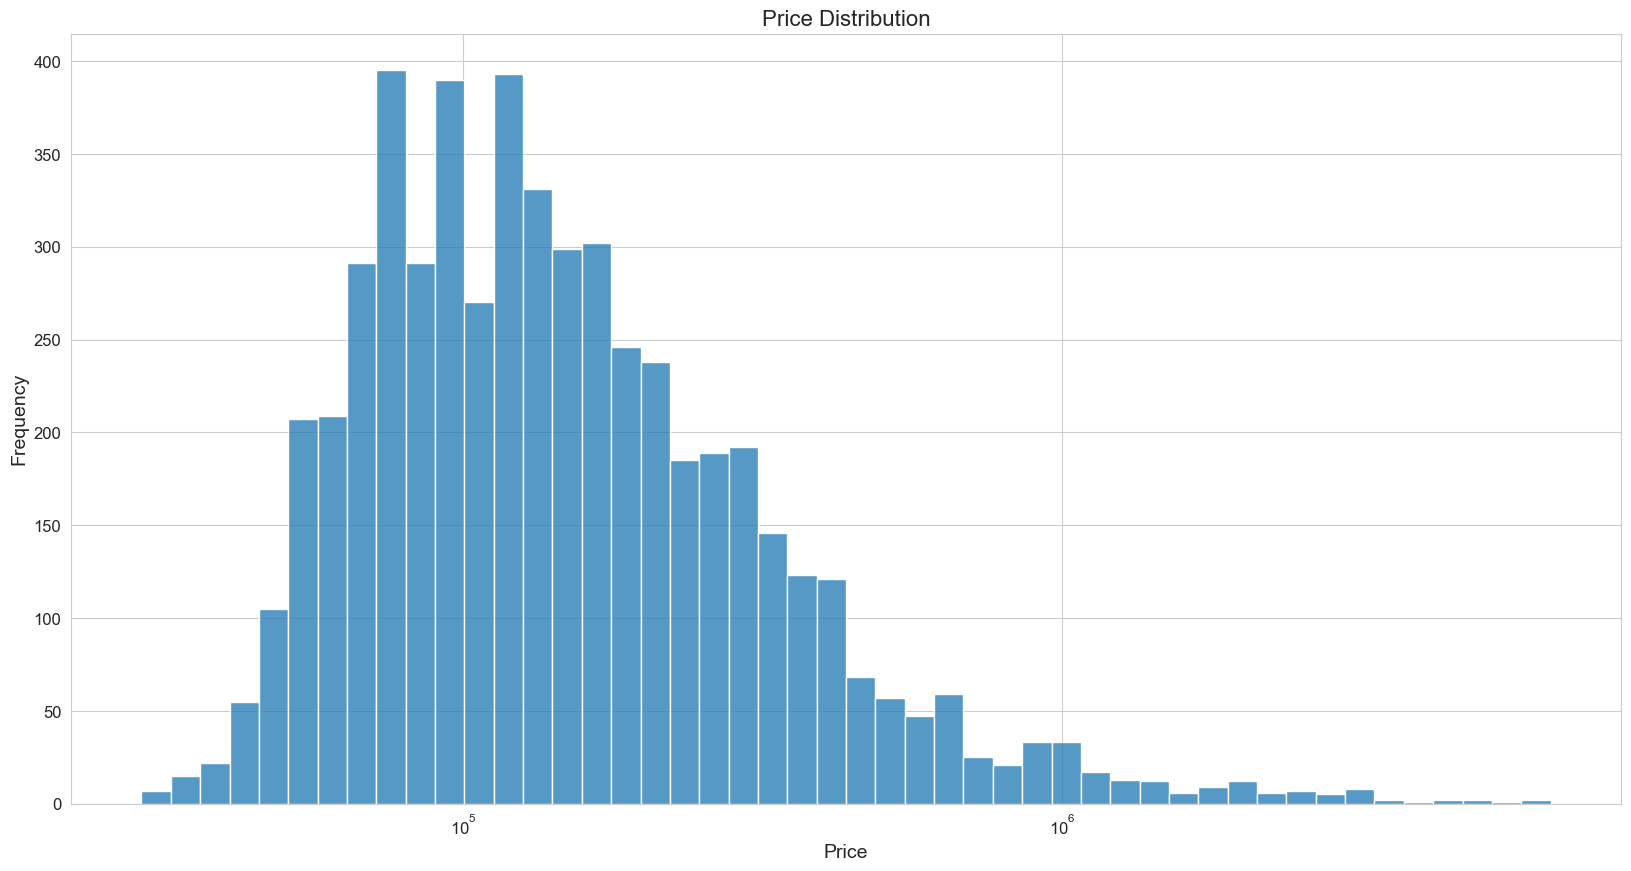

In [93]:
sns.histplot(data=df, x="price_in_usd", log_scale=True)
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Feature Selection & Data Split

In [94]:
x_var = df[
    [
        "admin_district_id",
        "hist_district_id",
        "street_id",
        "wall_id",
        "area_total",
        "rooms",
    ]
].values

y_var = df["price_in_usd"].values


x_train, x_test, y_train, y_test = train_test_split(
    x_var, y_var, test_size=0.2, random_state=0
)

print("X_train samples: ", x_train[0:5])
print("\n\nY_train samples: ", y_train[0:5])
print("\n\nX_test samples: ", x_test[0:5])
print("\n\nY_test samples: ", y_test[0:5])


X_train samples:  [[1 51 14 3 86.0 '2']
 [1 51 782 3 60.0 '2']
 [14 64 567 3 109.5 '2']
 [4 65 556 3 96.0 '3']
 [11 10 242 3 102.0 '1']]


Y_train samples:  [210000. 150000. 158775. 125000. 156900.]


X_test samples:  [[1 8 386 5 26.0 '1']
 [4 65 586 3 136.0 '5']
 [13 63 243 3 55.0 '1']
 [4 3 768 3 115.0 '3']
 [4 30 139 3 50.0 '1']]


Y_test samples:  [ 29000. 210000. 130000. 155000.  94000.]


## Modeling

    we are going to build and train five different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Bayesian regression model, Elastic Net regression model. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. And the process for all the models are the same, first, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.


In [95]:
# OLS
ols = LinearRegression()
ols.fit(x_train, y_train)
ols_yhat = ols.predict(x_test)

# Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
ridge_yhat = ridge.predict(x_test)

# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
lasso_yhat = lasso.predict(x_test)

# Bayesian
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
bayesian_yhat = bayesian.predict(x_test)

# Elastic Net
en = ElasticNet(alpha=0.01)
en.fit(x_train, y_train)
en_yhat = en.predict(x_test)

# Decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree_yhat = tree.predict(x_test)

# Random forest
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest_yhat = forest.predict(x_test)

# Gradient boosting
boosting = GradientBoostingRegressor()
boosting.fit(x_train, y_train)
boosting_yhat = boosting.predict(x_test)

# K-nearest neighbors
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)


### Model Evaluation

In [96]:
print(cl("EXPLAINED SCORE:", attrs=["bold"]))
print("-------------------------------------------------------------------------------")
print(cl("OLS model : {}".format(evs(y_test, ols_yhat)), attrs=["bold"]))
print(cl("Ridge model : {}".format(evs(y_test, ridge_yhat)), attrs=["bold"]))
print(cl("Lasso model : {}".format(evs(y_test, lasso_yhat)), attrs=["bold"]))
print(cl("Bayesian model : {}".format(evs(y_test, bayesian_yhat)), attrs=["bold"]))
print(cl("ElasticNet model : {}".format(evs(y_test, en_yhat)), attrs=["bold"]))
print(cl("Decision tree model : {}".format(evs(y_test, tree_yhat)), attrs=["bold"]))
print(cl("Random forest model : {}".format(evs(y_test, forest_yhat)), attrs=["bold"]))
print(
    cl(
        "Gradient boosting model : {}".format(evs(y_test, boosting_yhat)),
        attrs=["bold"],
    )
)
print(
    cl("K-nearest neighbors model : {}".format(evs(y_test, knn_yhat)), attrs=["bold"])
)
print("-------------------------------------------------------------------------------")


EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
OLS model : 0.64478156544662
Ridge model : 0.6447792511700406
Lasso model : 0.644781562999244
Bayesian model : 0.6445673470418701
ElasticNet model : 0.6446771355897712
Decision tree model : 0.7541597702512716
Random forest model : 0.7913629749516029
Gradient boosting model : 0.7715798993844616
K-nearest neighbors model : 0.7745496965738224
-------------------------------------------------------------------------------


In [97]:
print(cl("R-SQUARED:", attrs=["bold"]))
print("-------------------------------------------------------------------------------")
print(cl("R-Squared of OLS model is {}".format(r2(y_test, ols_yhat)), attrs=["bold"]))

print(
    cl("R-Squared of Ridge model is {}".format(r2(y_test, ridge_yhat)), attrs=["bold"])
)
print(
    cl("R-Squared of Lasso model is {}".format(r2(y_test, lasso_yhat)), attrs=["bold"])
)
print(
    cl(
        "R-Squared of Bayesian model is {}".format(r2(y_test, bayesian_yhat)),
        attrs=["bold"],
    )
)
print(cl("R-Squared of ElasticNet is {}".format(r2(y_test, en_yhat)), attrs=["bold"]))
print(cl("R-Squared of Decision tree is {}".format(r2(y_test, tree_yhat)), attrs=["bold"]))
print(cl("R-Squared of Random forest is {}".format(r2(y_test, forest_yhat)), attrs=["bold"]))
print(cl("R-Squared of Gradient boosting is {}".format(r2(y_test, boosting_yhat)), attrs=["bold"]))
print(cl("R-Squared of K-nearest neighbors is {}".format(r2(y_test, knn_yhat)), attrs=["bold"]))
print("-------------------------------------------------------------------------------")


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.644334440830937
R-Squared of Ridge model is 0.6443321669996322
R-Squared of Lasso model is 0.64433443853158
R-Squared of Bayesian model is 0.6441236956385306
R-Squared of ElasticNet is 0.6442317673946147
R-Squared of Decision tree is 0.7541559244735976
R-Squared of Random forest is 0.7913289470681423
R-Squared of Gradient boosting is 0.7712202055294538
R-Squared of K-nearest neighbors is 0.774513157694979
-------------------------------------------------------------------------------


    We can conclude that Random forest model would be the best decision for our house price dataset on basis of
    R-squared and Explained Variance Score


In [99]:
import joblib


joblib.dump(forest, "house_price_pred_model.jlb")


['house_price_pred_model.jlb']